In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Prepare Data

## Import data

In [2]:
df = pd.read_csv('data//SCFP2019.csv')
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


One of the first things you might notice here is that this dataset is HUGE — over 20,000 rows and 351 columns! SO MUCH DATA!!! We won't have time to explore all of the features in this dataset, but you can look in the [data dictionary](./Data_dictionary.ipynb) for this project for details and links to the official [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk.htm). For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the `"TURNFEAR"` column. 

## Filter the household feared being turn down for credit (**"TURNFEAR==1"**)

In [3]:
mask = (df.TURNFEAR == 1)
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Explore

### Age

In [4]:
age_groups = df_fear['AGECL'].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


Looking at the Code Book we can see that `"AGECL"` represents categorical data, even though the values in the column are numeric.
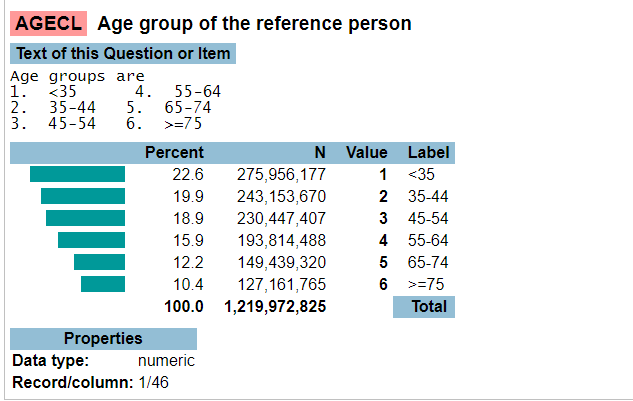

Convert column to human readable group names

In [5]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear['AGECL'].map(agecl_dict)
age_cl.head(10)

5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

- Visualize the bar plot

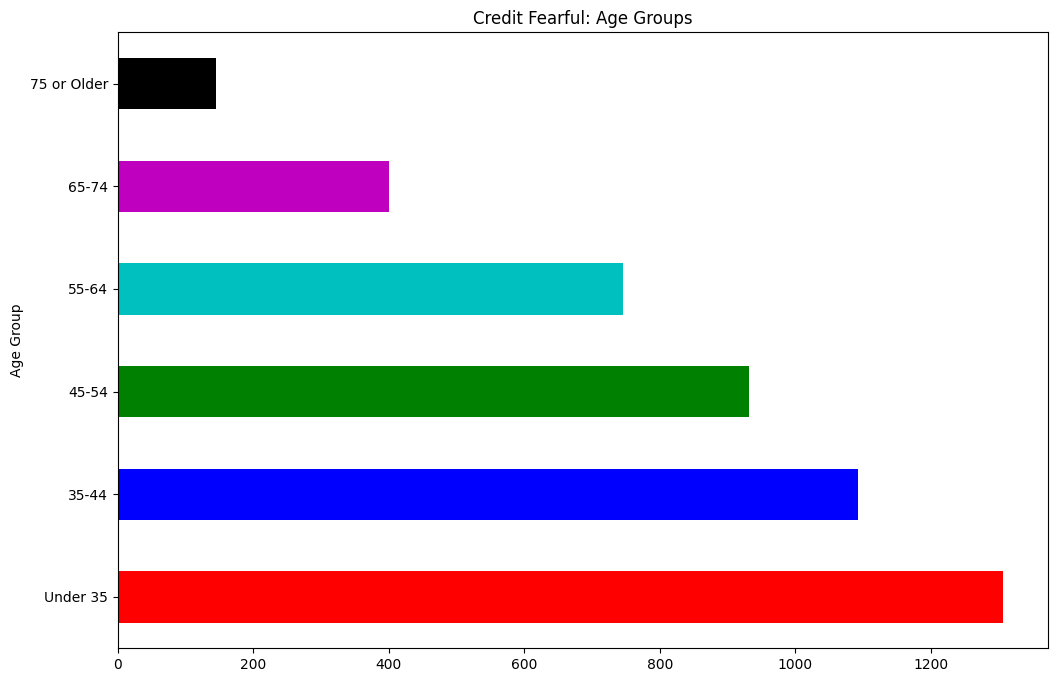

In [8]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
plt.figure(figsize=(12,8))
age_cl_value_counts.plot(kind='barh',
                         x= age_cl_value_counts.index,
                         xlabel='Age Group',
                         ylabel='Frequency (count)',
                         title='Credit Fearful: Age Groups',
                         color = ['r','b','g','c','m','black']
                        )
plt.show()

You might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us comprised of 6 bins. Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

To do that, we'll need to look at a different variable: `"AGE"`. Whereas `"AGECL"` was a categorical variable, `"AGE"` is continuous, so we can use it to make a histogram of our own.

- Histogram of `AGE`

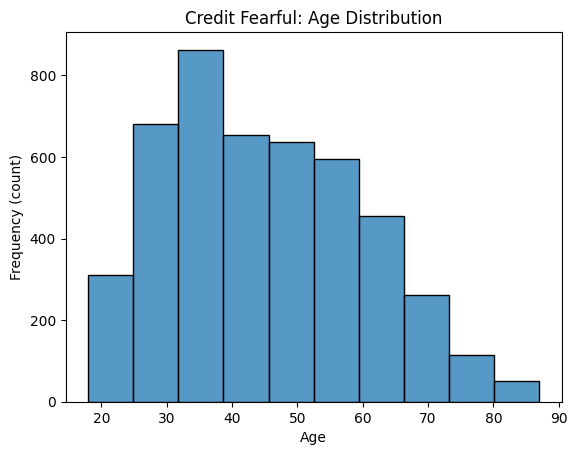

In [11]:
# Plot histogram of "AGE"
sns.histplot(data=df_fear,x='AGE',bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency (count)')
plt.title('Credit Fearful: Age Distribution')
plt.show()

It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are *most* concerned seem to be between 30 and 40. 

### Race

Now that we have an understanding of how age relates to our outcome of interest, let's try some other possibilities, starting with race. If we look at the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE) for `"RACE"`, we can see that there are 4 categories.

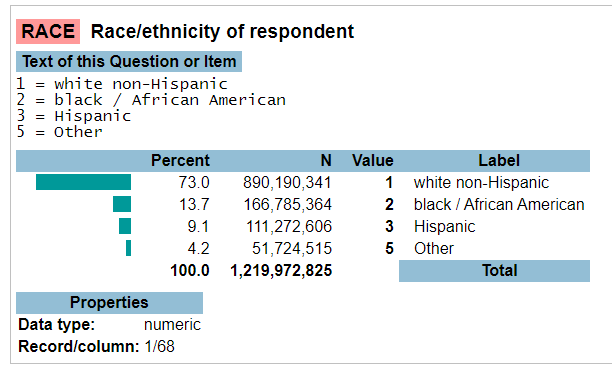

Note that there's no `4` category here. If a value for 4 *did* exist, it would be reasonable to assign it to "Asian American / Pacific Islander" — a group that doesn't seem to be represented in the dataset. This is a strange omission, but you'll often find that large public datasets have these sorts of issues. The important thing is to always read the data dictionary carefully. In this case, remember that this dataset doesn't provide a complete picture of race in America — something that you'd have to explain to anyone interested in your analysis.

In [34]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear['RACE'].map(race_dict)

race_value_counts = race.value_counts(normalize=True)
race_value_counts

White/Non-Hispanic        0.539477
Black/African-American    0.237508
Hispanic                  0.162232
Other                     0.060783
Name: RACE, dtype: float64

- Visualize the bar horizontal for ethnicity of respondent

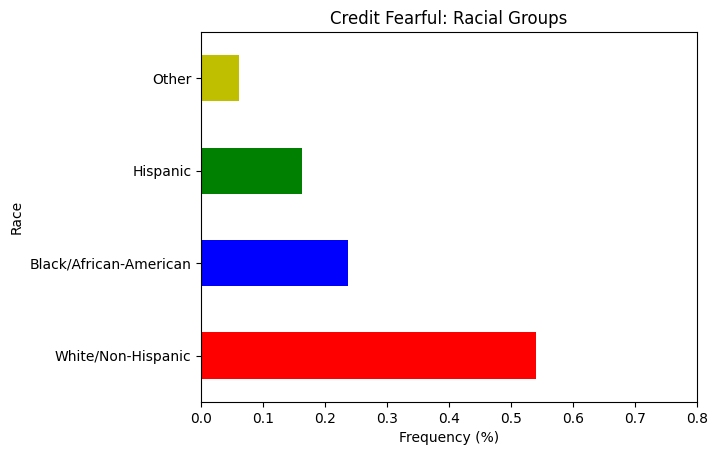

In [35]:
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh',color=['r','b','g','y'])
plt.xlim((0, 0.8))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups")
plt.show()

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

- Let try visualizing the same plot but using the `df` instead of the subset `df_fear`

In [37]:
race_full = df['RACE'].map(race_dict)
race_value_counts_full = race_full.value_counts(normalize=True)
race_value_counts_full

White/Non-Hispanic        0.716739
Black/African-American    0.130068
Hispanic                  0.096625
Other                     0.056569
Name: RACE, dtype: float64

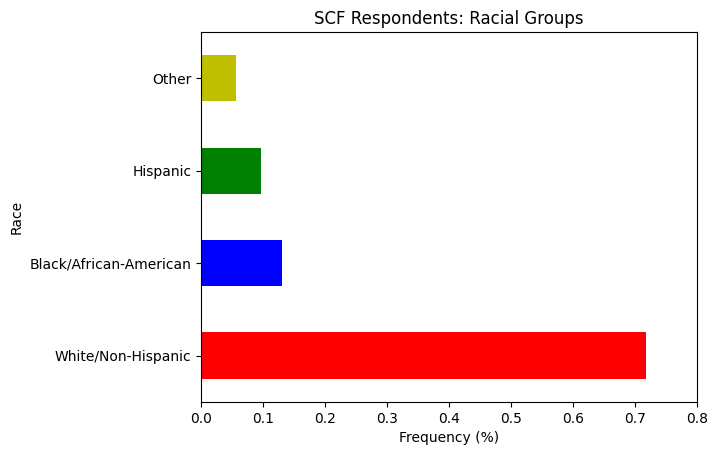

In [38]:
race_value_counts_full.plot(kind='barh',color=['r','b','g','y'])
plt.xlim((0, 0.8))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups")
plt.show()

How does this second bar chart change our perception of the first one? On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 54% of credit fearful respondents.

- Let excluding the White None-Hispanic and comparing the other in both of group

In [55]:
race_value_counts

White/Non-Hispanic        0.539477
Black/African-American    0.237508
Hispanic                  0.162232
Other                     0.060783
Name: RACE, dtype: float64

In [54]:
race_value_counts_full

White/Non-Hispanic        0.716739
Black/African-American    0.130068
Hispanic                  0.096625
Other                     0.056569
Name: RACE, dtype: float64

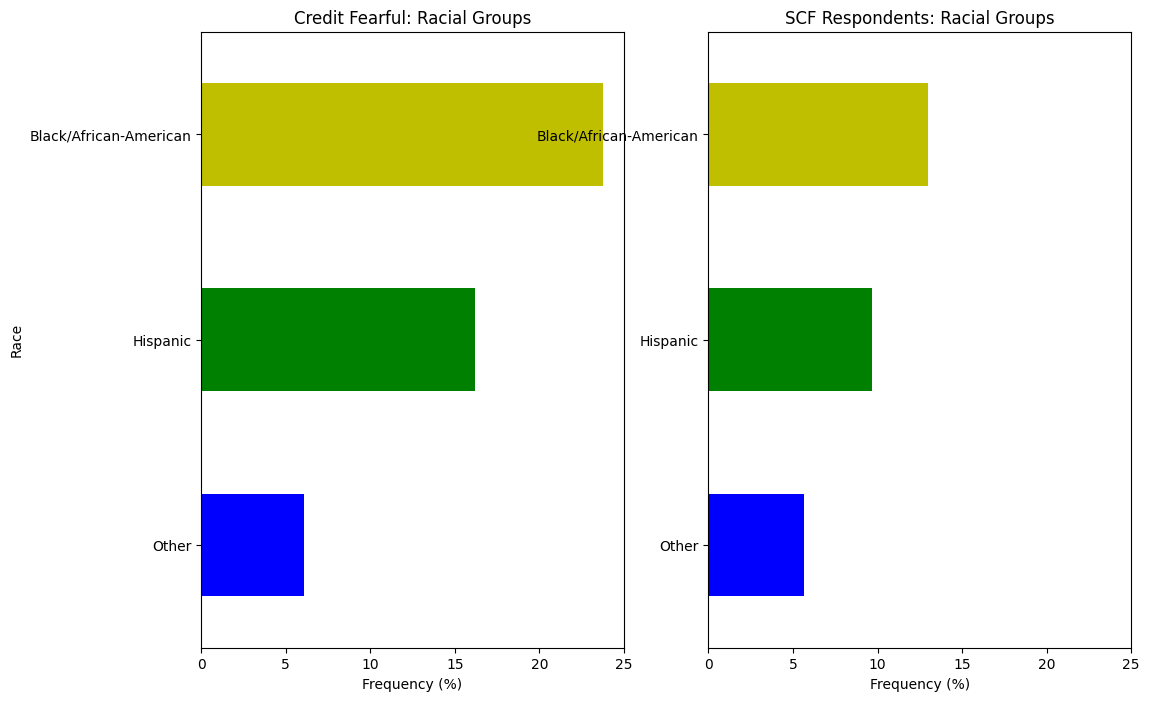

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))

(race_value_counts*100).nsmallest(3).plot(kind='barh',color=['b','g','y'],ax=ax[0])
ax[0].set_xlabel("Frequency (%)")
ax[0].set_ylabel("Race")
ax[0].set_xlim((0, 25))
ax[0].set_title("Credit Fearful: Racial Groups")

(race_value_counts_full*100).nsmallest(3).plot(kind='barh',color=['b','g','y'],ax=ax[1])
ax[1].set_xlim((0, 25))
ax[1].set_xlabel("Frequency (%)")
ax[1].set_title("SCF Respondents: Racial Groups")
plt.show()

On the other hand, `Black and Hispanic respondents` represent 23% of the whole dataset but 40% of credit fearful respondents. In other words, `Black and Hispanic` households are actually *more* likely to be in the credit fearful group. 

### Income

What about income level? Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our subgroup using the `"INCCAT"` feature, which captures income percentile groups. This time, though, we'll make a single, side-by-side bar chart.

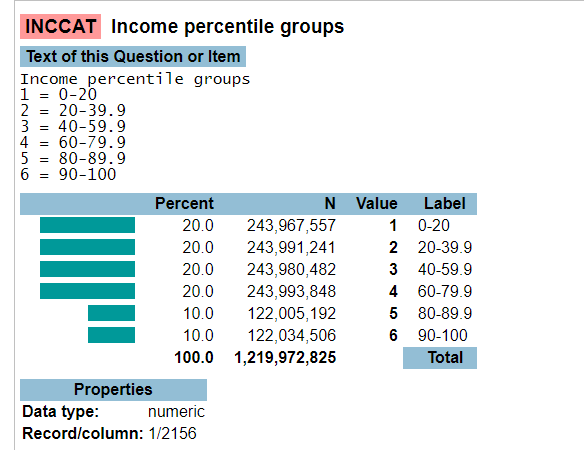

In [47]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df['INCCAT']
    .map(inccat_dict)
    .groupby(df['TURNFEAR'])
    .value_counts(normalize=True)
    .rename('frequency')
    .reset_index()
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


- Visualize the bar plot for Income category

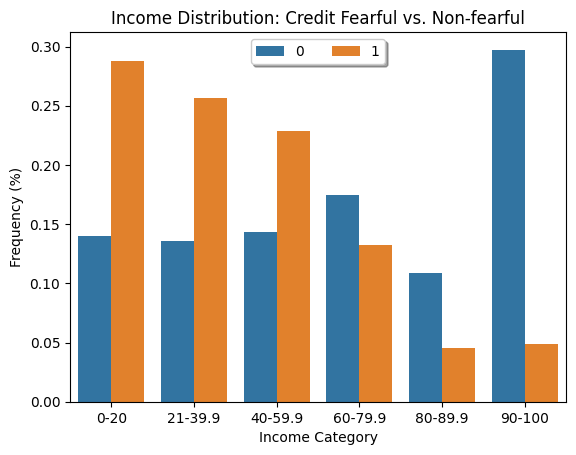

In [59]:
# Create bar chart of `df_inccat`
sns.barplot(
    data=df_inccat,
    x='INCCAT',
    y='frequency',
    hue='TURNFEAR',
    order=inccat_dict.values()
)
plt.legend(loc='upper center',ncol=2, fancybox=True, shadow=True)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful")
plt.show()

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes. 

So, based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. 

That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future

### Assets

Not all the data is demographic, though. If you were working for a bank, you would probably care less about how old the people are, and more about their ability to carry more debt. If we were going to build a model for that, we'd want to establish some relationships among the variables, and making some correlation matrices is a good place to start.

First, let's zoom out a little bit. We've been looking at only the people who answered "yes" when the survey asked about `"TURNFEAR"`, but what if we looked at everyone instead? To begin with, let's bring in a clear dataset and run a single correlation.

- Correlation coefficient for `"ASSET"` and `"HOUSES"` in the whole dataset `df`.


In [60]:
asset_house_corr =  df['ASSET'].corr(df['HOUSES'])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779253


That's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. What about the people in our `TURNFEAR` subset, though? Let's run that correlation to see if there's a difference.

- Correlation coefficient for `"ASSET"` and `"HOUSES"` in the subset `df_fear`.

In [61]:
asset_house_corr =  df_fear['ASSET'].corr(df_fear['HOUSES'])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735979155


It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is **stronger** for our `TURNFEAR` group than it is for the population as a whole. 

Let's make correlation matrices using the rest of the data for both `df` and `df_fear` and see if the differences persist. Here, we'll look at only 5 features: `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"`, and `"EDUC"`.

- Full Dataset

In [62]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


- Feared credit dataset

In [64]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


The relationship between `"DEBT"` and `"HOUSES"` is positive for both datasets, but while the coefficient for `df` is fairly weak at 0.26, the same number for `df_fear` is 0.96. 

The closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. 

This suggests that the main source of debt being carried by our `"TURNFEAR"` folks is their primary residence, which, again, is an intuitive finding. 

`"DEBT"` and `"ASSET"` share a similarly striking difference.

Let's make some visualizations to show these relationships graphically.

### Debts

***Relationship between `DEBT` and `ASSET`.***

- Full dataset

In [66]:
df[['DEBT','ASSET']].corr()

,DEBT,ASSET
DEBT,1.00000,0.26125
ASSET,0.26125,1.00000


In [81]:
np.log((df['DEBT'])).values

array([       -inf,        -inf,        -inf, ..., 10.73639668,
       10.89673933, 10.71441777])

C:\Users\trilnd\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


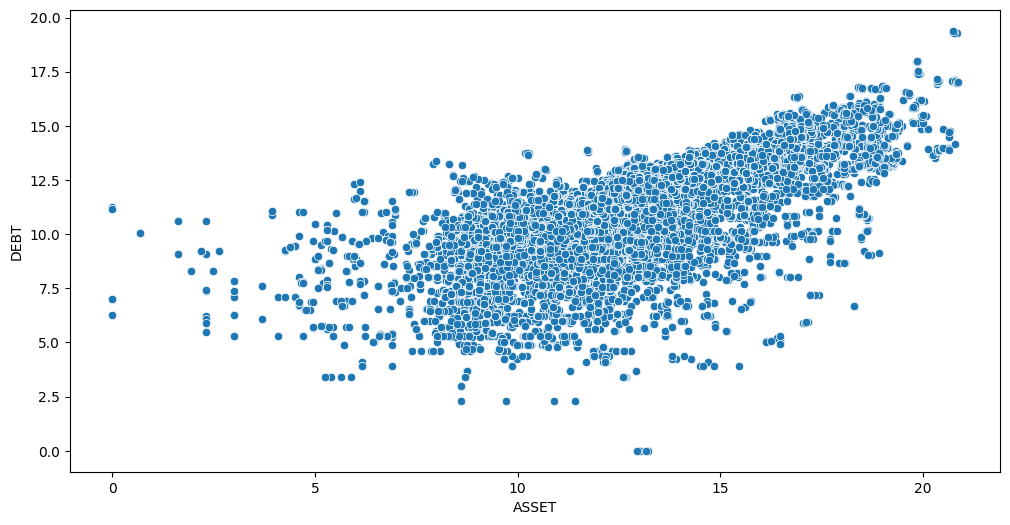

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=np.log(df['DEBT']),x=np.log(df['ASSET']))
plt.show()

- Feared credit subset

In [65]:
df_fear[['DEBT','ASSET']].corr()

,DEBT,ASSET
DEBT,1.000000,0.474658
ASSET,0.474658,1.000000


In [71]:
df_fear[['DEBT','ASSET']].quantile([0.25,0.75],axis=0)

,DEBT,ASSET
0.25,1000.0,7965.0
0.75,99200.0,215765.0


- To including the outlier, use logarit for both Debt and Asset

C:\Users\trilnd\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


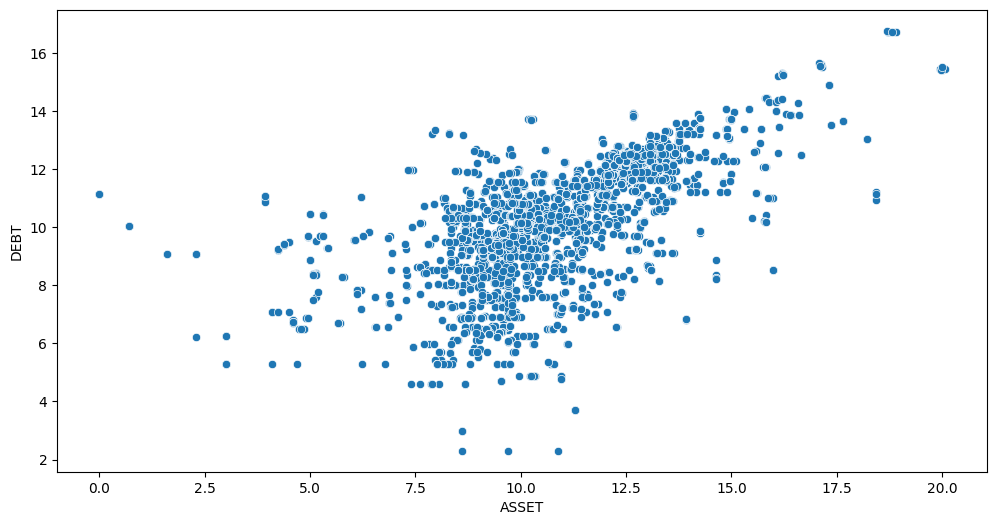

In [75]:
# Create scatter plot of ASSET vs DEBT, df_fear
plt.figure(figsize=(12,6))
sns.scatterplot(y=np.log(df_fear['DEBT']),x=np.log(df_fear['ASSET']))
plt.show()

Let's end with the most striking difference from our matrices, and make some scatter plots showing the difference between `HOUSES` and `DEBT`.

***Relationship between `DEBT` and `HOUSES`.***

- Full dataset

In [83]:
df[['DEBT','HOUSES']].corr()

,DEBT,HOUSES
DEBT,1.000000,0.266661
HOUSES,0.266661,1.000000


C:\Users\trilnd\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


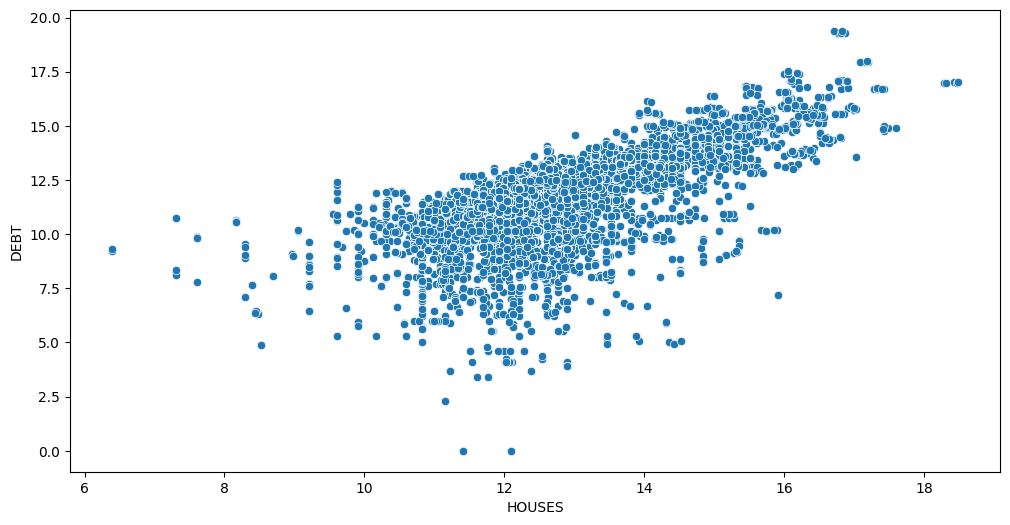

In [86]:
# Create scatter plot of HOUSES vs DEBT, df
plt.figure(figsize=(12,6))
sns.scatterplot(y=np.log(df['DEBT']),x=np.log(df['HOUSES']))
plt.show()

- Feared Credit subset

In [87]:
df_fear[['DEBT','HOUSES']].corr()

,DEBT,HOUSES
DEBT,1.000000,0.962629
HOUSES,0.962629,1.000000


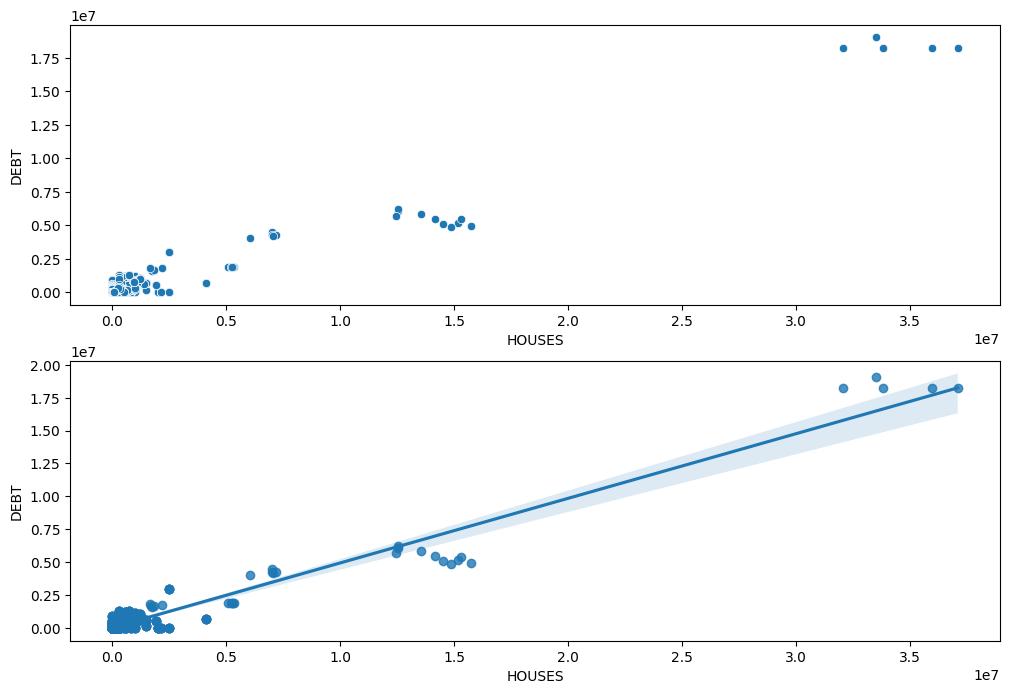

In [93]:
fig,ax = plt.subplots(2,1,figsize=(12,8))
sns.scatterplot(data=df_fear,y='DEBT',x='HOUSES',ax=ax[0])
sns.regplot(data=df_fear,y='DEBT',x='HOUSES',ax=ax[1])
plt.show()

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our `df_fear` graph shows an almost perfect linear relationship, while our `df` graph shows something a little more muddled. You might also notice that the datapoints on the `df_fear` graph form several little groups. Those are called "clusters," and we'll be talking more about how to analyze clustered data in the next lesson.

If we use log, we could see the regression relationship between HOUSE and DEBT

C:\Users\trilnd\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


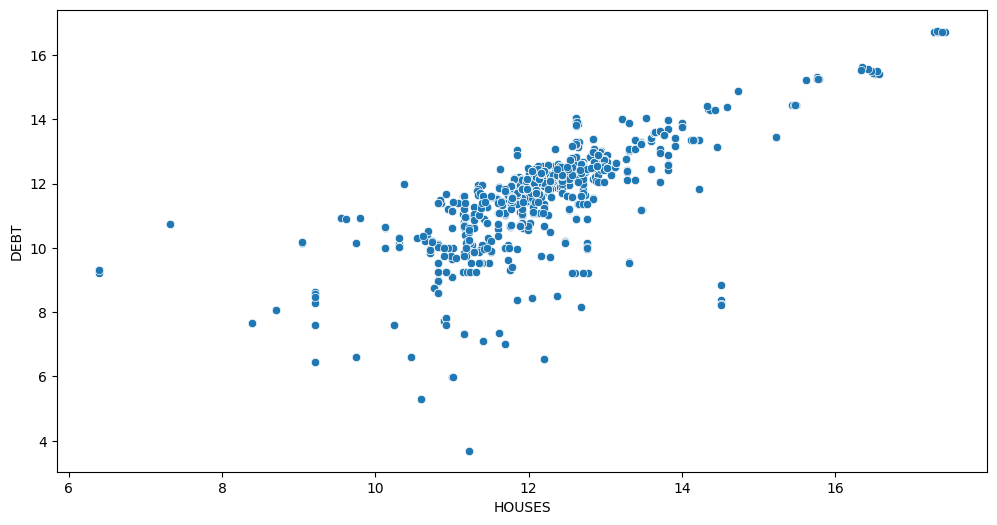

In [95]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=np.log(df_fear['HOUSES']),y = np.log(df_fear['DEBT']))
plt.show()